In [13]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mr.dataset
import mr.stat
import mr.io

In [14]:
sns.set()
plt.rcParams['figure.figsize'] = (12, 12)
sns.set_style("whitegrid")

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

In [15]:
filename = mr.dataset.download_ml_small()
# filename = mr.dataset.download_ml_25m()

In [16]:
nnz_lst = mr.io.read_movielens_input(filename)

In [17]:
# Basic Statistics

nnz_count = nnz_lst.shape[0]
row_set = set()
col_set = set()
rowdegree2count = defaultdict(int)
coldegree2count = defaultdict(int)
row2count = defaultdict(int)
col2count = defaultdict(int)
row2averagerating = defaultdict(int)
col2averagerating = defaultdict(int)

min_rating = float('inf')
max_rating = float('-inf')

min_row = float('inf')
max_row = float('-inf')
min_col = float('inf')
max_col = float('-inf')

for nnz in nnz_lst:
    row, col, rating = nnz
    row_set.add(row)
    col_set.add(col)
    
    row2count[row] += 1
    col2count[col] += 1
    row2averagerating[row] += rating
    col2averagerating[col] += rating
    
    if rating > max_rating:
        max_rating = rating
    if rating < min_rating:
        min_rating = rating
    
    if row < min_row:
        min_row = row
    if row > max_row:
        max_row = row
    if col < min_col:
        min_col = col
    if col > max_col:
        max_col = col
    
row_count = len(row_set)
col_count = len(col_set)

# Degree Stats

row_min_degree = float('inf')
row_max_degree = float('-inf')
row_ave_degree = nnz_count / row_count
col_min_degree = float('inf')
col_max_degree = float('-inf')
col_ave_degree = nnz_count / col_count

rowdegree2count = defaultdict(int)
coldegree2count = defaultdict(int)

for row, count in row2count.items():
    if count < row_min_degree:
        row_min_degree = count
    if count > row_max_degree:
        row_max_degree = count
    
    row2averagerating[row] /= count
    
    rowdegree2count[count] += 1

for col, count in col2count.items():
    if count < col_min_degree:
        col_min_degree = count
    if count > col_max_degree:
        col_max_degree = count
    
    col2averagerating[col] /= count
    
    coldegree2count[count] += 1

# Output Stats

print('Basic Stats of the Dataset')
print('==========')
print('row count: {}'.format(row_count))
print('col count: {}'.format(col_count))
print('nnz count: {}'.format(nnz_count))
print('density: {:.5f}'.format(nnz_count / (row_count * col_count)))
print('minimum rating: {}'.format(min_rating))
print('maximum rating: {}'.format(max_rating))
print('minimum row index: {}'.format(min_row))
print('maximum row index: {}'.format(max_row))
print('minimum col index: {}'.format(min_col))
print('maximum col index: {}'.format(max_col))

print()

print('Degree Stats of the Dataset')
print('==========')
print('minimum row degree: {}'.format(row_min_degree))
print('maximum row degree: {}'.format(row_max_degree))
print('average row degree: {:.3f}'.format(row_ave_degree))
print('minimum col degree: {}'.format(col_min_degree))
print('maximum col degree: {}'.format(col_max_degree))
print('average col degree: {:.3f}'.format(col_ave_degree))

Basic Stats of the Dataset
row count: 610
col count: 9724
nnz count: 100836
density: 0.01700
minimum rating: 0.5
maximum rating: 5.0
minimum row index: 1.0
maximum row index: 610.0
minimum col index: 1.0
maximum col index: 193609.0

Degree Stats of the Dataset
minimum row degree: 20
maximum row degree: 2698
average row degree: 165.305
minimum col degree: 1
maximum col degree: 329
average col degree: 10.370


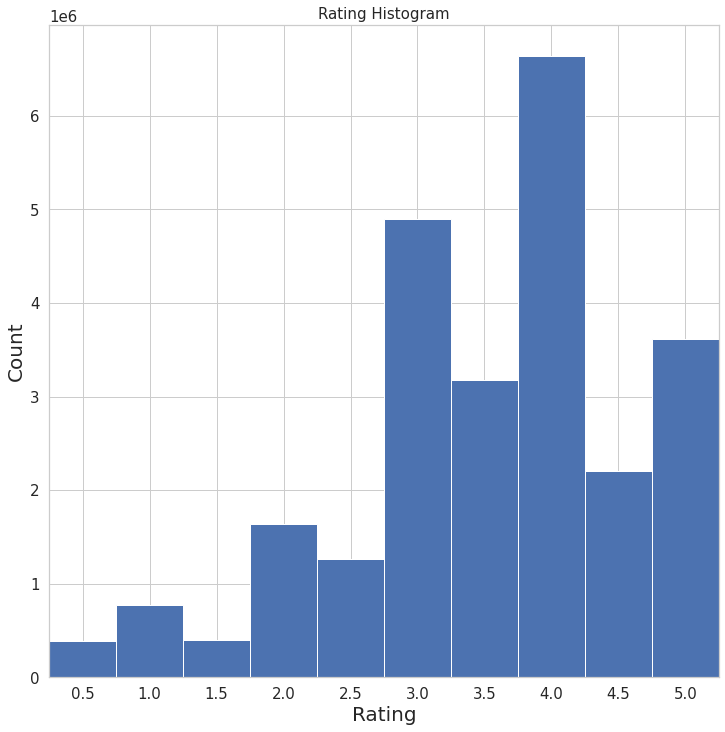

In [7]:
plt.hist(nnz_lst[:, 2], bins=np.arange(11) * 0.5 + 0.5)
plt.xlim(0.5, 5.5)
plt.xticks(np.arange(10) * 0.5 + 0.75, np.arange(10) * 0.5 + 0.5)
plt.title('Rating Histogram')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

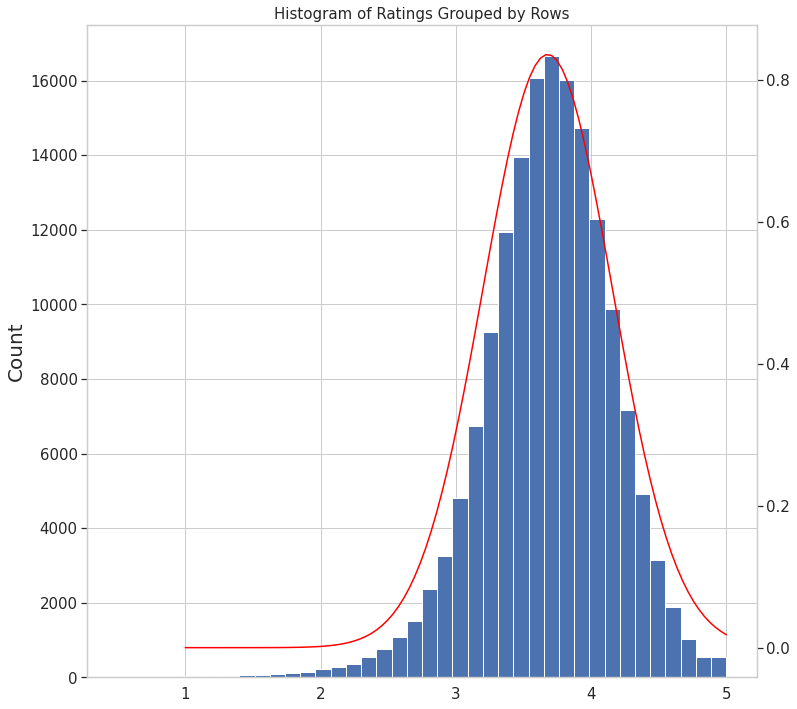

In [10]:
row_rating_lst = row2averagerating.values()

mean, std = mr.stat.fit_normal_dist(row_rating_lst)

fig, ax1 = plt.subplots()

ax1.hist(row_rating_lst, bins=40)
plt.ylabel('Count')

ax2 = ax1.twinx()
ax2.grid(False)

x = np.linspace(1, 5, 100)
y = mr.stat.pdf_normal(x, mean, std)
ax2.plot(x, y, c='red')

plt.title('Histogram of Ratings Grouped by Rows')
plt.show()

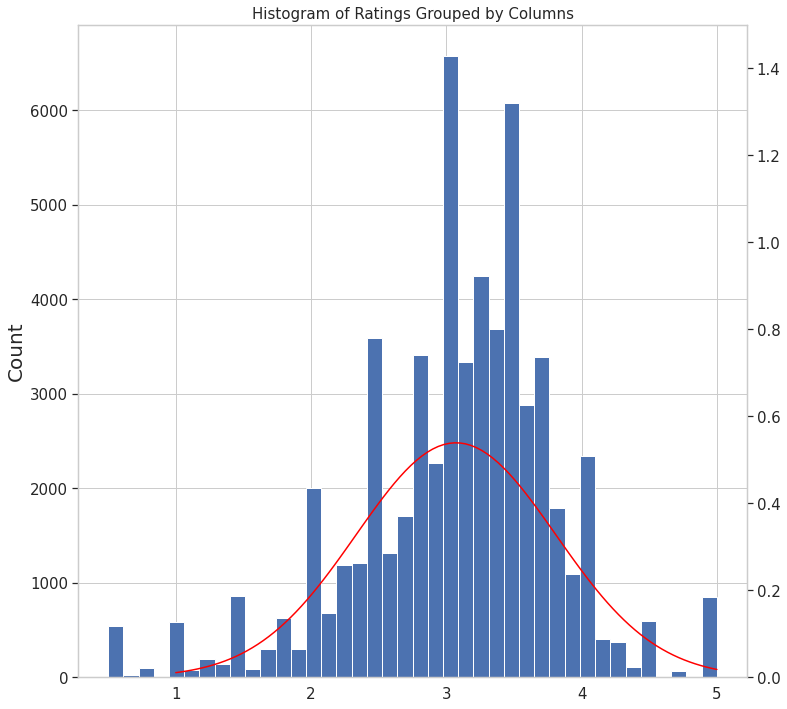

In [11]:
col_rating_lst = col2averagerating.values()

mean, std = mr.stat.fit_normal_dist(col_rating_lst)

fig, ax1 = plt.subplots()

ax1.hist(col_rating_lst, bins=40)
plt.ylabel('Count')

ax2 = ax1.twinx()
ax2.grid(False)

x = np.linspace(1, 5, 100)
y = mr.stat.pdf_normal(x, mean, std)
ax2.plot(x, y, c='red')
plt.ylim(0, 1.5)

plt.title('Histogram of Ratings Grouped by Columns')
plt.show()

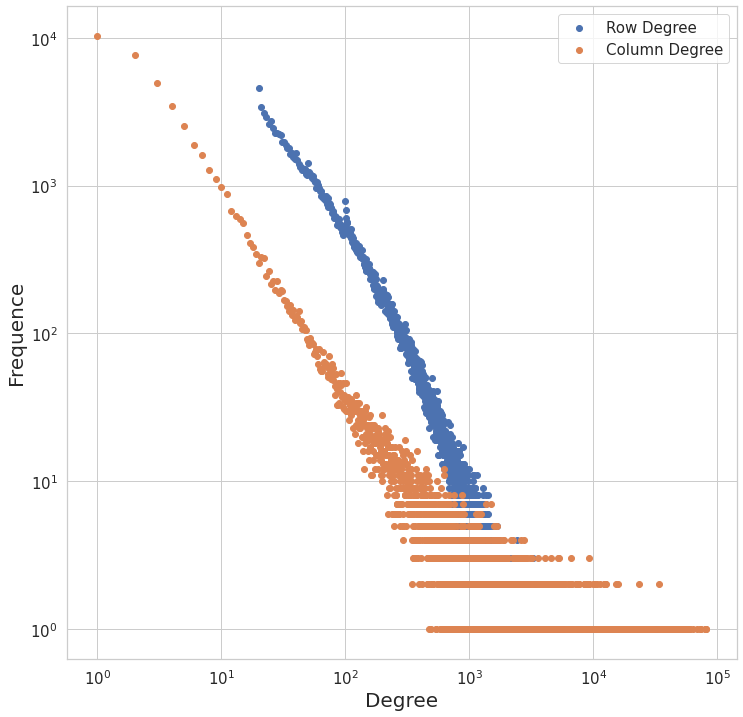

In [12]:
row_dist = np.array(list(rowdegree2count.items()))
col_dist = np.array(list(coldegree2count.items()))

plt.scatter(row_dist[:, 0], row_dist[:, 1], label='Row Degree')
plt.scatter(col_dist[:, 0], col_dist[:, 1], label='Column Degree')

plt.yscale('log', base=10) 
plt.xscale('log', base=10) 

plt.legend()

plt.xlabel('Degree')
plt.ylabel('Frequence')
plt.show()